In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 999
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support

<h2><b>Goal</b></h2><br/>
It is becoming more and more common for people to read and share news online and there are numerous mediums to hold online content. Online news has become popular due to the rise of internet and predicting the popularity of such information has become important for content providers or advertisers,  to share news that’ll be of interest to the readers. Hence, it will be an interesting binary classification problem to find out if a news article would be popular or not  using Machine Learning models. I have done my part of research to address this problem and came up with decent solutions that I'll be discussing in the below sections. 

<b>My study is an attempt to find answers to the following questions:</b><br/>
1. Finding the optimal week days to publish a certain type of article for it to become popular<br/>
2. Predict the popularity of a given article using classification methods<br/>

<h2><b>About the dataset</b></h2><br/>
<b>Data source:</b> UCI Machine Learning Repository <br/>
<b>Link:</b> http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity <br/>
<b>Number of variables:</b> 61 <br/>
<b>No of records:</b> 39,645 <br/>

In [5]:
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\Supervised Learning Capstone\OnlineNewsPopularity\OnlineNewsPopularity.csv")
df.columns = df.columns.str.replace(' ', '')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
print('Number of rows: {} \nNumber of colmuns: {}\n'.format(df.shape[0],df.shape[1]))
for i in df.columns:
  print('{} is unique: {}'.format(i, df[i].is_unique))

Number of rows: 39644 
Number of colmuns: 61

url is unique: True
timedelta is unique: False
n_tokens_title is unique: False
n_tokens_content is unique: False
n_unique_tokens is unique: False
n_non_stop_words is unique: False
n_non_stop_unique_tokens is unique: False
num_hrefs is unique: False
num_self_hrefs is unique: False
num_imgs is unique: False
num_videos is unique: False
average_token_length is unique: False
num_keywords is unique: False
data_channel_is_lifestyle is unique: False
data_channel_is_entertainment is unique: False
data_channel_is_bus is unique: False
data_channel_is_socmed is unique: False
data_channel_is_tech is unique: False
data_channel_is_world is unique: False
kw_min_min is unique: False
kw_max_min is unique: False
kw_avg_min is unique: False
kw_min_max is unique: False
kw_max_max is unique: False
kw_avg_max is unique: False
kw_min_avg is unique: False
kw_max_avg is unique: False
kw_avg_avg is unique: False
self_reference_min_shares is unique: False
self_referen

In [7]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

<h2><b>Data Cleaning</b></h2><br/>
1. There are no null values in the dataset<br/>
2. Removed rows that have 0 number of words or 0 rate of non-stop words in the content<br/>
3. Removed rows that do not belong to any news type

In [8]:
print(df.query('n_tokens_content<=0 | n_non_stop_words<=0').n_tokens_content.count())
df = df[(df.n_tokens_content > 0) & (df.n_non_stop_words > 0)]
df.n_tokens_content.count()

1181


38463

In [9]:
#remove rows that do not belong to any news type
df.query('data_channel_is_lifestyle == 0 & data_channel_is_entertainment == 0 & data_channel_is_bus == 0 & data_channel_is_socmed == 0 & data_channel_is_tech == 0 & data_channel_is_world == 0').count()

df.drop(df.query('data_channel_is_lifestyle == 0 & data_channel_is_entertainment == 0 & data_channel_is_bus == 0 & data_channel_is_socmed == 0 & data_channel_is_tech == 0 & data_channel_is_world == 0').index, inplace = True) 
df.shape

(32972, 61)

In [10]:
print(df.isnull().values.sum())

0


<h2><b>Dealing with Outliers</b></h2><br/>
There are outliers for a number of columns in the dataset. Since the records are valid (as news popularity can vary drastically), it is not appropriate to remove them. Hence, I determined the low and high quantiles and crunched the values that are above and below the quantile range to match the range.

In [11]:
def update_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    df_updatedOutliers = df
    for name in list(df.columns):
        df_updatedOutliers[name] = np.where((df[name] < quant_df.loc[low, name]), quant_df.loc[low, name],np.where((df[name] > quant_df.loc[high, name]), quant_df.loc[high, name], df[name]))
    return df_updatedOutliers
df_updatedOutliers = update_outlier(df.drop(['url'],1))
print(df_updatedOutliers.shape)

(32972, 60)


In [13]:
df_updatedOutliers.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,32972.000000,32972.000000,32972.000000,32972.000000,3.297200e+04,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000
mean,355.567603,10.397276,567.445015,0.537245,1.000000e+00,0.692063,9.830462,3.103330,3.297222,0.506126,4.680737,7.191587,0.062993,0.207934,0.189100,0.070090,0.222158,0.247725,25.763891,843.974251,269.732477,6641.284696,753532.706539,237403.510379,1017.749445,4686.569328,2827.915150,2216.520233,6202.371897,3879.941123,0.172207,0.187371,0.189646,0.184065,0.141453,0.060445,0.064813,0.125258,0.207246,0.136359,0.242032,0.132603,0.266817,0.446524,0.121413,0.040302,0.016261,0.708779,0.291163,0.356977,0.088169,0.781713,-0.258512,-0.537361,-0.099656,0.265132,0.068515,0.343994,0.132908,2237.761161
std,210.583860,1.966810,370.049864,0.088316,2.840478e-09,0.085170,7.278129,2.441807,4.912307,0.851537,0.241411,1.901703,0.242954,0.405835,0.391594,0.255302,0.415703,0.431698,69.190838,641.736837,170.846562,11857.855014,210333.652431,110727.079434,1041.700463,1640.742422,697.785637,2902.463880,8474.164315,4724.170477,0.377566,0.390215,0.392027,0.387543,0.348494,0.238313,0.246199,0.331016,0.274208,0.208728,0.291657,0.205234,0.300540,0.071896,0.077746,0.014200,0.008250,0.130626,0.130617,0.068724,0.045463,0.198901,0.093694,0.269517,0.055942,0.314101,0.194570,0.188364,0.182235,2123.245315
min,44.000000,7.000000,148.000000,0.383644,1.000000e+00,0.530322,2.000000,0.000000,0.000000,0.000000,4.256344,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,86.000000,33.000000,0.000000,69100.000000,27630.873016,0.000000,3248.573427,1740.095940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020041,0.020009,0.020023,0.020015,0.020577,0.310096,-0.020282,0.016760,0.003378,0.451613,0.071429,0.232722,0.033333,0.500000,-0.448415,-1.000000,-0.250000,0.000000,-0.300000,0.000000,0.000000,576.000000
25%,168.000000,9.000000,279.000000,0.470779,1.000000e+00,0.631970,5.000000,1.000000,1.000000,0.000000,4.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,442.000000,141.567460,0.000000,843300.000000,165308.333333,0.000000,3498.957378,2311.074246,654.000000,1100.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025234,0.025

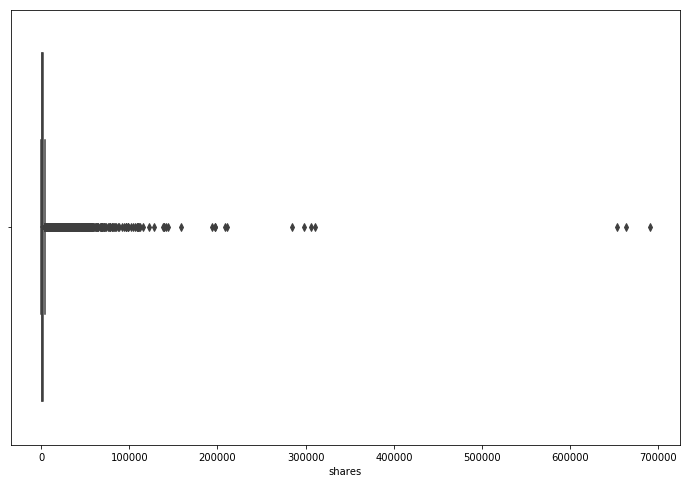

In [14]:
#Box plot for shares before handling outliers
plt.figure(figsize=(12,8))
ax = sns.boxplot(df['shares'])

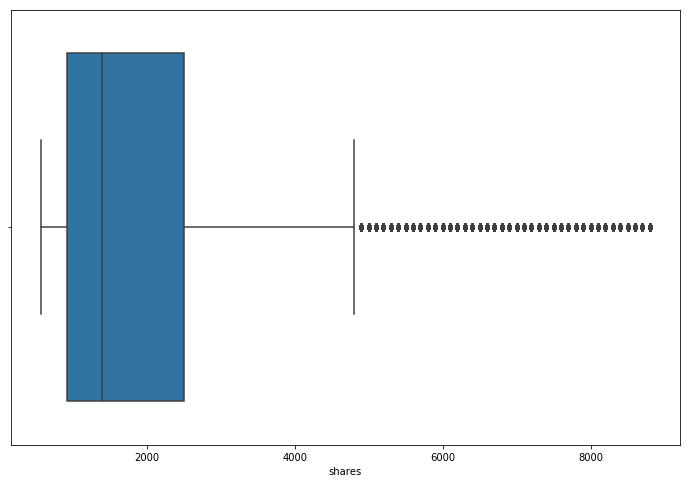

In [15]:
#Box plot for shares after handling outliers
plt.figure(figsize=(12,8))
ax = sns.boxplot(df_updatedOutliers['shares'])

<h2><b>New variable that determines the popularity of a news article</b></h2><br/>
In this dataset, Shares is the variable that is associated to the popularity of the article. This is a number variable and it is binarized using a cutoff value. Value from 50% records is chosen for the cutoff.

In [16]:
df_updatedOutliers['isPopular'] = np.where(df_updatedOutliers['shares']>=1400, 1, 0)
df_updatedOutliers.reset_index(inplace=True)
df_updatedOutliers.describe()

,index,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,isPopular
count,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,3.297200e+04,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000
mean,19758.088257,355.567603,10.397276,567.445015,0.537245,1.000000e+00,0.692063,9.830462,3.103330,3.297222,0.506126,4.680737,7.191587,0.062993,0.207934,0.189100,0.070090,0.222158,0.247725,25.763891,843.974251,269.732477,6641.284696,753532.706539,237403.510379,1017.749445,4686.569328,2827.915150,2216.520233,6202.371897,3879.941123,0.172207,0.187371,0.189646,0.184065,0.141453,0.060445,0.064813,0.125258,0.207246,0.136359,0.242032,0.132603,0.266817,0.446524,0.121413,0.040302,0.016261,0.708779,0.291163,0.356977,0.088169,0.781713,-0.258512,-0.537361,-0.099656,0.265132,0.068515,0.343994,0.132908,2237.761161,0.513254
std,11386.337101,210.583860,1.966810,370.049864,0.088316,2.840478e-09,0.085170,7.278129,2.441807,4.912307,0.851537,0.241411,1.901703,0.242954,0.405835,0.391594,0.255302,0.415703,0.431698,69.190838,641.736837,170.846562,11857.855014,210333.652431,110727.079434,1041.700463,1640.742422,697.785637,2902.463880,8474.164315,4724.170477,0.377566,0.390215,0.392027,0.387543,0.348494,0.238313,0.246199,0.331016,0.274208,0.208728,0.291657,0.205234,0.300540,0.071896,0.077746,0.014200,0.008250,0.130626,0.130617,0.068724,0.045463,0.198901,0.093694,0.269517,0.055942,0.314101,0.194570,0.188364,0.182235,2123.245315,0.499832
min,0.000000,44.000000,7.000000,148.000000,0.383644,1.000000e+00,0.530322,2.000000,0.000000,0.000000,0.000000,4.256344,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,86.000000,33.000000,0.000000,69100.000000,27630.873016,0.000000,3248.573427,1740.095940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020041,0.020009,0.020023,0.020015,0.020577,0.310096,-0.020282,0.016760,0.003378,0.451613,0.071429,0.232722,0.033333,0.500000,-0.448415,-1.000000,-0.250000,0.000000,-0.300000,0.000000,0.000000,576.000000,0.000000
25%,9856.750000,168.000000,9.000000,279.000000,0.470779,1.000000e+00,0.631970,5.000000,1.000000,1.000000,0.000000,4.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,442.000000,141.567460,0.000000,843300.000000,165308.333333,0.000000,3498.957378,2311.074246,654.0

<h2><b>Goal 1 - Finding the optimal week days to publish a certain type of article for it to become popular</b></h2><br/>
<b>Looking at the columns in the dataset we can identify 5 different article topics:</b> <br/>
Lifestyle<br/>        
Entertainment <br/>   
Business <br/>            
Social media <br/>      
Technology <br/>          
World <br/>
The data also specifies the day of the week when the article was released.

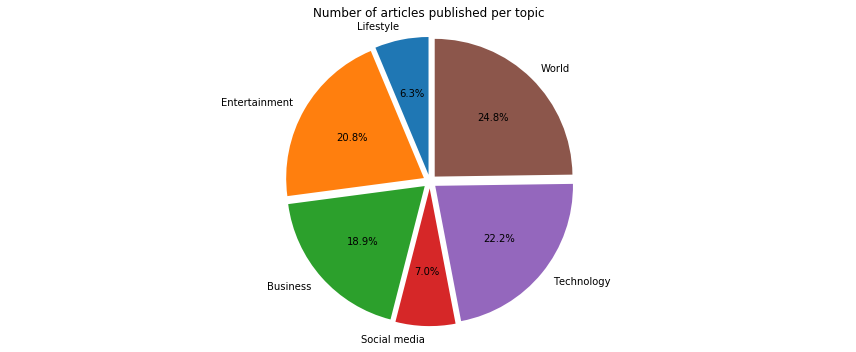

In [17]:
#Pie chart for different topics
labels = ['Lifestyle', 'Entertainment', 'Business', 'Social media', 'Technology', 'World']
topic_sizes = [df_updatedOutliers['data_channel_is_lifestyle'].sum(), df_updatedOutliers['data_channel_is_entertainment'].sum(),df_updatedOutliers['data_channel_is_bus'].sum(),df_updatedOutliers['data_channel_is_socmed'].sum(),df_updatedOutliers['data_channel_is_tech'].sum(),df_updatedOutliers['data_channel_is_world'].sum()]
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
fig, ax = plt.subplots(figsize=(12, 5))
ax.pie(topic_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title("Number of articles published per topic")
plt.tight_layout()
plt.show()

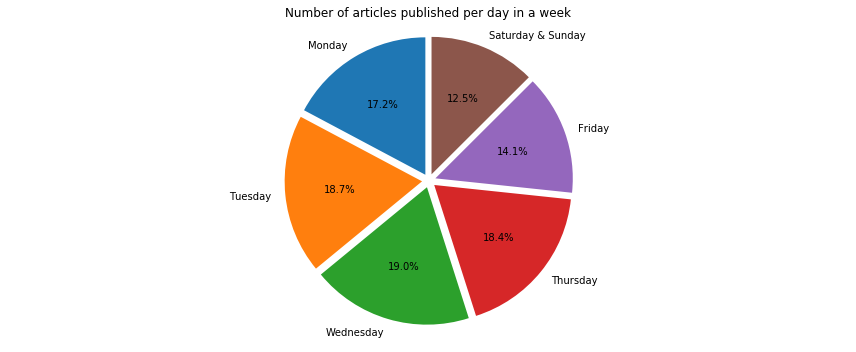

In [18]:
#Pie chart for different days of the week
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday & Sunday']
day_sizes = [df_updatedOutliers['weekday_is_monday'].sum(), df_updatedOutliers['weekday_is_tuesday'].sum(),df_updatedOutliers['weekday_is_wednesday'].sum(),df_updatedOutliers['weekday_is_thursday'].sum(),df_updatedOutliers['weekday_is_friday'].sum(),df_updatedOutliers['is_weekend'].sum()]
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
fig, ax = plt.subplots(figsize=(12, 5))
ax.pie(day_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title("Number of articles published per day in a week")
plt.tight_layout()
plt.show()

In [19]:
#Count of articles published per topic per week day
df_WeekDayDummies = df_updatedOutliers[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','is_weekend']]
df_WeekDayDummies.rename(columns={'weekday_is_monday':'Monday',
                          'weekday_is_tuesday':'Tuesday',
                          'weekday_is_wednesday':'Wednesday',
                          'weekday_is_thursday':'Thursday',
                          'weekday_is_friday':'Friday',
                          'is_weekend':'Saturday_and_Sunday'}, 
                 inplace=True)

df_TopicDummies = df_updatedOutliers[['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']]
df_TopicDummies.rename(columns={'data_channel_is_lifestyle':'Lifestyle',
                          'data_channel_is_entertainment':'Entertainment',
                          'data_channel_is_bus':'Business',
                          'data_channel_is_socmed':'Social_Media',
                          'data_channel_is_tech':'Technology',
                          'data_channel_is_world':'World'}, 
                 inplace=True)

df_TopicAndDay = pd.DataFrame(columns=['Topic', 'WeekDay', 'isPopular'])
df_TopicAndDay['Topic'] = pd.Series(df_TopicDummies.columns[np.where(df_TopicDummies!=0)[1]])
df_TopicAndDay['WeekDay'] = pd.Series(df_WeekDayDummies.columns[np.where(df_WeekDayDummies!=0)[1]]) 
df_TopicAndDay['isPopular'] = pd.Series(df_updatedOutliers['isPopular'])

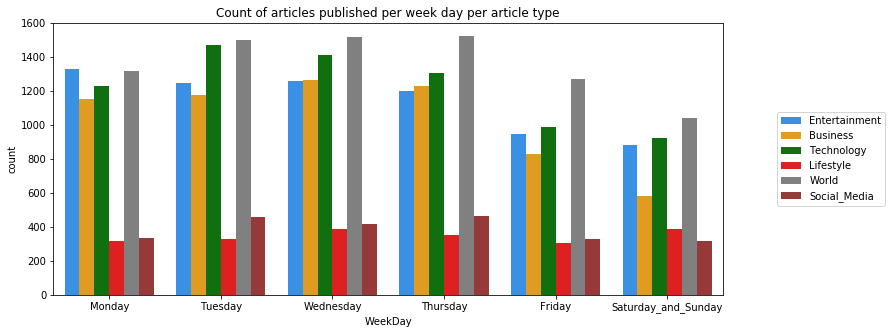

In [21]:
#Count of articles published per week day per article type
color_dict = dict({'Entertainment':'dodgerblue',
                  'Business':'orange',
                  'Technology': 'green',
                  'Lifestyle': 'red',
                   'World': 'grey',
                   'Social_Media': 'brown'})
plt.figure(figsize=(12,5))
g = sns.countplot(x="WeekDay", hue="Topic", data=df_TopicAndDay, palette=color_dict)
plt.title("Count of articles published per week day per article type")
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

In [22]:
df_agg = (df_TopicAndDay.groupby(['WeekDay','Topic']).agg({'isPopular':['count','sum']})).reset_index()
df_agg.columns = ["_".join(x) for x in df_agg.columns.ravel()]
df_agg.rename(columns={'WeekDay_':'WeekDay',
                       'Topic_':'Topic',
                        'isPopular_count':'no_of_articles',
                        'isPopular_sum':'no_of_popular_articles'}, 
                 inplace=True)
df_agg['pct_of_popular_articles'] = (100 * df_agg.no_of_popular_articles) / df_agg.no_of_articles

Text(0.5, 1.0, 'Percentage of popular articles published per week day per article type')

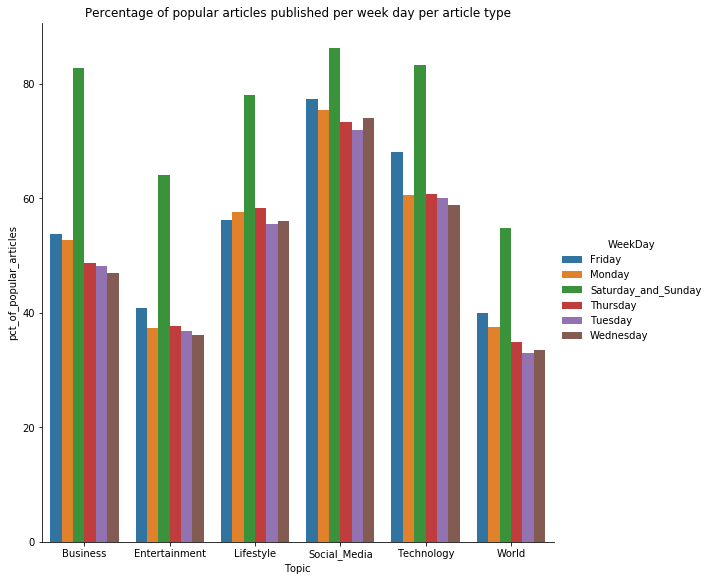

In [24]:
#Percentage of popular articles published per week day per article type
g = sns.catplot(x="Topic", y="pct_of_popular_articles", hue="WeekDay", data=df_agg, kind="bar", height=8)
plt.title("Percentage of popular articles published per week day per article type")

<b>Goal 1 conclusion:</b><br/> 
The above graph indicates that articles of any topic will be more popular if they are published over the weekends. Also, topics related to social media and technology gain more attention than other topics.

<h2><b>Goal 2 - Predict the popularity of a given article using classification methods</b></h2><br/>
<b>Following are the steps that are implemented to achieve Goal 2:</b><br/>
<ol>
    <li>5 Machine Learning models have been selected for predicting the news popularity - Random Forest Classifier, Gradient Boosting Classifier, Bernoulli Naive Bayes, K Neighbors Classifier and Logistic Regression</li>
    <li>Initally, all the models are trained and tested using default parameters and cleaned data.</li>
    <li>Select K Best, RFE for Random forest are used for feature selection and PCA is implemented on the dataset. The models are run on the new feature selects to check for accuracy. Select K Best yielded better results. Depending on the results, 3 best models were selected and refined for better results. They include Gradient Boosting Classifier, Random Forest and Logistic Regression </li>
    <li>Finally, parameter tuning on the 3 models is done on K Best features and the final results are predicted along with other model assessing values</li>
</ol>

In [34]:
def modelCVTest(X_Data, Y_Data):
    print("Mean accuracy for Gradient Boosting Classifier: {}".format(np.mean(cross_val_score(gbc, X_Data, Y_Data, cv=5))))
    print("Mean accuracy for Random Forest Classifier: {}".format(np.mean(cross_val_score(clf, X_Data, Y_Data, cv=5))))
    print("Mean accuracy for Bernoulli Naive Bayes Classifier: {}".format(np.mean(cross_val_score(bnb, X_Data, Y_Data, cv=5))))
    print("Mean accuracy for K Neighbors Classifier: {}".format(np.mean(cross_val_score(neighbors, X_Data, Y_Data, cv=5))))
    print("Mean accuracy for Logistic Regression: {}".format(np.mean(cross_val_score(lr, X_Data, Y_Data, cv=5))))

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

gbc = GradientBoostingClassifier()
clf = RandomForestClassifier(n_estimators=50, random_state=41, max_depth=3)
bnb = BernoulliNB()
neighbors = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(C=1e9)

X = df_updatedOutliers.drop(['index','shares','isPopular'],1)
Y = df_updatedOutliers['isPopular']

modelCVTest(X, Y)

Mean accuracy for Gradient Boosting Classifier: 0.4610569535783561
Mean accuracy for Random Forest Classifier: 0.5899814865115143
Mean accuracy for Bernoulli Naive Bayes Classifier: 0.6163114593305811
Mean accuracy for K Neighbors Classifier: 0.5411282484727802
Mean accuracy for Logistic Regression: 0.6033027350558082


In [36]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=20)
X_PCA = sklearn_pca.fit_transform(X)

modelCVTest(X_PCA, Y)

Mean accuracy for Gradient Boosting Classifier: 0.5737598432687705
Mean accuracy for Random Forest Classifier: 0.5998140807464759
Mean accuracy for Bernoulli Naive Bayes Classifier: 0.5868945359157951
Mean accuracy for K Neighbors Classifier: 0.5411282484727802
Mean accuracy for Logistic Regression: 0.573003919526481


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
select_feature = SelectKBest(f_classif, k=20).fit(x_train, y_train)
selected_columns = x_train.columns[select_feature.get_support(indices=True)]
print('Features:', selected_columns)

X_kbest = X[selected_columns]

modelCVTest(X_kbest, Y)

Features: Index(['num_hrefs', 'data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_avg_min',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_saturday', 'is_weekend', 'LDA_02', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'rate_positive_words',
       'rate_negative_words'],
      dtype='object')
Mean accuracy for Gradient Boosting Classifier: 0.6503715916692965
Mean accuracy for Random Forest Classifier: 0.6383623513300862
Mean accuracy for Bernoulli Naive Bayes Classifier: 0.618981026262826
Mean accuracy for K Neighbors Classifier: 0.566815740439935
Mean accuracy for Logistic Regression: 0.6435180710026882


In [40]:
from sklearn.feature_selection import RFE
clf_rf = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf, n_features_to_select=20, step=1)
rfe = rfe.fit(x_train, y_train)
selected_columns_rfe = x_train.columns[rfe.get_support(indices=True)]
print('Chosen best 20 feature by rfe:',x_train.columns[rfe.get_support(indices=False)])

X_RFE = X[selected_columns_rfe]

print("Mean accuracy for Random Forest Classifier: {}".format(np.mean(cross_val_score(clf, X_RFE, Y, cv=5))))

Chosen best 20 feature by rfe: Index(['timedelta', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'average_token_length', 'kw_avg_min',
       'kw_avg_max', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'rate_positive_words',
       'avg_positive_polarity'],
      dtype='object')
Mean accuracy for Random Forest Classifier: 0.5769100173271375


<b>SelectKBest feature selection coupled with Gradient Boosting Classifier, Random Forest and Logistic Regression have given the best results so far. Time to tune the parameters for both the methods to check if they can perform any better.</b>

In [46]:
#Function  for final model results
def modelTest(algName, algorithm, X_Data, Y_Data, X_trainData, Y_trainData, X_testData, Y_testData, CVFolds):
    algorithm.fit(X_trainData, Y_trainData)
    #train_pred = algorithm.predict(X_trainData)
    y_pred = algorithm.predict(X_testData)
    print(algName)
    print('Accuracy score: {}'.format(accuracy_score(Y_testData, y_pred)))
    print('Mean of cross validation score: {}'.format(np.mean(cross_val_score(algorithm, X_Data, Y_Data, cv=CVFolds))))
    eval = precision_recall_fscore_support(Y_testData, y_pred, average='binary')
    print('Precision: {}, Recall: {}, F-beta score: {}'.format(eval[0],eval[1],eval[2]))
    
    if(algName != 'Logistic Regression'):
        feat_imp = pd.Series(algorithm.feature_importances_, X_Data.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

Gradient Boost Classification
Accuracy score: 0.6636676101900526
Mean of cross validation score: 0.6503715916692965
Precision: 0.665767674821807, Recall: 0.6846275752773375, F-beta score: 0.6750659244066803


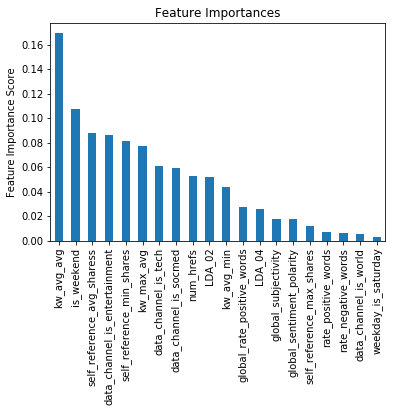

In [49]:
x_kbesttrain, x_kbesttest, y_kbesttrain, y_kbesttest = train_test_split(X[selected_columns], Y, test_size=0.3, random_state=42)

modelTest('Gradient Boost Classification', gbc, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 5)

Random Forest Classification
Accuracy score: 0.6438536190861303
Mean of cross validation score: 0.6383623513300862
Precision: 0.635893780074853, Recall: 0.7068145800316957, F-beta score: 0.6694811896050287


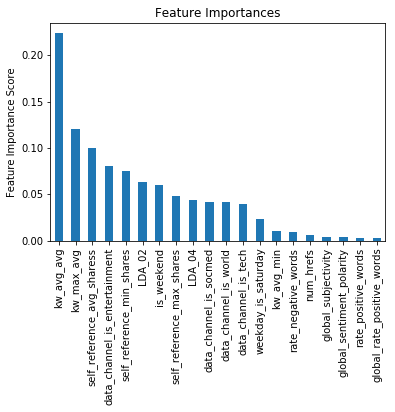

In [48]:
modelTest('Random Forest Classification', clf, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 5)

In [50]:
modelTest('Logistic Regression', lr, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 5) 

Logistic Regression
Accuracy score: 0.6497169429842297
Mean of cross validation score: 0.6435180710026882
Precision: 0.647695465571935, Recall: 0.6875990491283677, F-beta score: 0.6670510233496685


<h2><b>Parameter Tuning:</b></h2>

In [51]:
#For Gradient Boosting Classifier
from sklearn.model_selection import learning_curve,GridSearchCV

#param_test1 = {'n_estimators':range(20,81,10),'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200), 'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10), 'max_features':range(7,20,2),'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
param_test1 = {'n_estimators':range(20,81,10),'max_depth':range(5,16,2)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'n_estimators': 80}, 0.7251223748796354)

In [52]:
param_test2 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}

gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators = 80, max_depth=5, learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch2.best_params_, gsearch2.best_score_

({'min_samples_leaf': 50, 'min_samples_split': 1200}, 0.7258146973860354)

In [53]:
param_test3 = {'max_features':range(7,20,2),'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators = 80, max_depth=5, learning_rate=0.1, min_samples_split=1200,min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch3.best_params_, gsearch3.best_score_

({'max_features': 19, 'subsample': 0.8}, 0.7268036919608257)

In [54]:
#For Random Forest Classifier
param_test1 = {'n_estimators':range(20,81,10),'max_depth':range(5,16,2)}

gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 15, 'n_estimators': 80}, 0.7175890838206628)

In [55]:
param_test2 = {'min_samples_split':range(2,1000,200), 'min_samples_leaf':range(30,71,10)}

gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 80, max_depth=15, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch2.best_params_, gsearch2.best_score_

({'min_samples_leaf': 50, 'min_samples_split': 2}, 0.7211099931891307)

In [56]:
param_test3 = {'max_features':range(7,20,2)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 80, max_depth=15, min_samples_split=2,min_samples_leaf=50,max_features=19,random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch3.best_params_, gsearch3.best_score_

({'max_features': 9}, 0.7211684633269921)

In [64]:
C_param_range = {'C':[0.001,0.01,0.1,1,10,100,1000, 10000], 'max_iter':range(1,200,25)}
lr = LogisticRegression(penalty='l2',C = i,random_state = 0)
gsearch1 = GridSearchCV(estimator = LogisticRegression(penalty='l2',C = 0.001,random_state = 10, max_iter=1), 
param_grid = C_param_range, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch1.best_params_, gsearch1.best_score_

({'C': 1000, 'max_iter': 51}, 0.7058477841189318)

<h2><b>Final Results</b></h2>

Gradient Boost Classification
Accuracy score: 0.6637687019813991
Mean of cross validation score: 0.6504019222728754
Precision: 0.6658959537572254, Recall: 0.6846275752773375, F-beta score: 0.6751318616917367


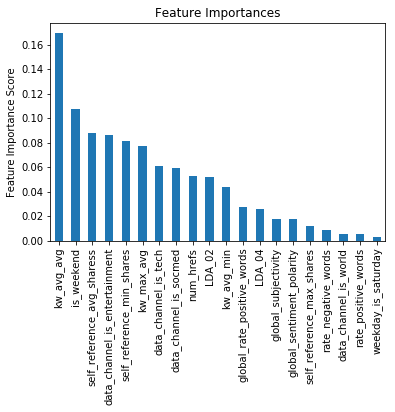

In [65]:
#Final results
gbc_final = GradientBoostingClassifier(n_estimators = 80, max_depth=5, learning_rate=0.1, min_samples_split=1200,min_samples_leaf=50,max_features=19,subsample=0.8,random_state=10)
rf_final = RandomForestClassifier(n_estimators = 80, max_depth=15, min_samples_split=2,min_samples_leaf=50,max_features=9,random_state=10)
lr_final = LogisticRegression(penalty='l2',C = 1000,random_state = 10, max_iter=51)

modelTest('Gradient Boost Classification', gbc_final, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 5)

Random Forest Classification
Accuracy score: 0.6438536190861303
Mean of cross validation score: 0.6383623513300862
Precision: 0.635893780074853, Recall: 0.7068145800316957, F-beta score: 0.6694811896050287


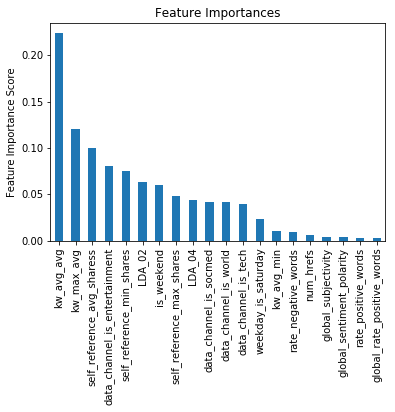

In [66]:
modelTest('Random Forest Classification', rf_final, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 5)

In [68]:
modelTest('Logistic Regression', lr_final, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 5) 

Logistic Regression
Accuracy score: 0.6442579862515164
Mean of cross validation score: 0.6438513810816218
Precision: 0.6365422396856582, Recall: 0.7060221870047544, F-beta score: 0.6694843617920541


<b>Goal 2 results:</b><br/>
Looking at the scores, it is evident that Gradient Boosting Classifier predicted results better than the other models. The Final accuracy is 0.66 with Precision: 0.66 and Recall: 0.68. However, the remaining 2 models were close enough and predicted were equally good.